In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import manifold
from sklearn import datasets

%matplotlib inline

In [3]:
# Get MNIST dataset
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

# Extract x,y pixel values and the target values
pixel_values, targets = data
targets = targets.astype(int)


In [4]:
pixel_values.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Convert the pixel dataframe to numpy array (for reshaping in next step)
pixels_arr = pixel_values.to_numpy()

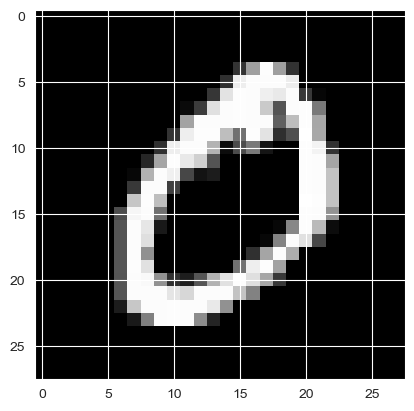

In [6]:
# Reshape the image pixels into 28x28 format
single_image = pixels_arr[1, :].reshape(28, 28)

plt.imshow(single_image, cmap='gray')

In [7]:
# Create the tSNE transformation of the dataset
tsne = manifold.TSNE(n_components=2, random_state=42)

transformed_data = tsne.fit_transform(pixels_arr[:10000, :])

/Users/mridul/opt/anaconda3/envs/python3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/mridul/opt/anaconda3/envs/python3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


This will create a dataset of dimension 10000 x 2

In [8]:
#Convert the transformed data into dataframe
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:10000])),
    columns=["x","y","targets"]
)

# Add targets as the column
tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)

tsne_df.head(10)

,x,y,targets
0,41.938377,2.883497,5
1,48.862514,-36.611340,0
2,37.866386,64.252083,4
3,-60.924198,27.318644,1
4,16.006502,37.442104,9
5,-44.972454,-45.356304,2
6,-66.944115,-34.761215,1
7,-1.538404,-15.637506,3
8,-68.739891,-26.525888,1
9,-12.010055,48.659790,4


/Users/mridul/opt/anaconda3/envs/python3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


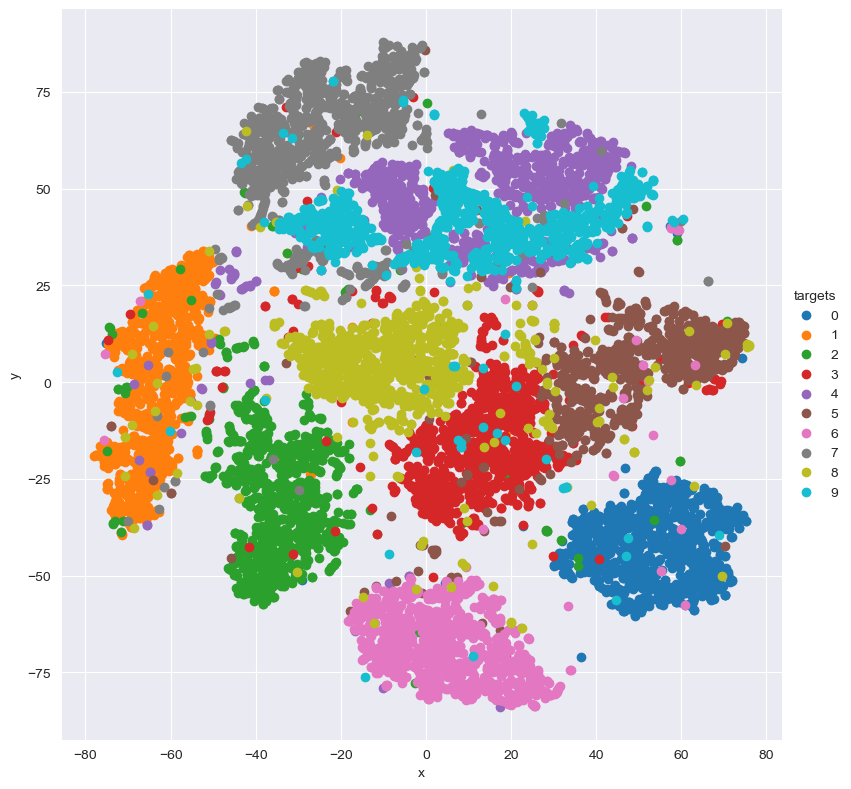

In [9]:
# Plot the clusters for digits in a 2D
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()